# Support Vector Machines
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
![alt](https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png)
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.
![alt](https://miro.medium.com/max/1400/0*ecA4Ls8kBYSM5nza.jpg)


Let us now try to implement what we have learned so far in python using scikit-learn. To make a support vector machine classifier, we will follow the following steps.

- Loading the data

- Exploring Data

- Splitting Data

- Generating The Model

- Model Evaluation

- Loading The Data

We are using the cancer data-set in the sklearn library, we will make a classifier to predict whether the cancer is malignant or benign. We can load the data-set in the following manner.

In [1]:
from sklearn import datasets
 
cancer_data = datasets.load_breast_cancer()
print(cancer_data.data[5])

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]


In [2]:
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

In this, 0 represents malignant, and 1 represents benign.
***  
### Splitting Data

We will divide the data-set into a training set and test set to get accurate results. After this, we will split the data using the train_test_split() function. We will need 3 parameters like in the example below. The features to train the model, the target, and the test set size.

In [3]:
from sklearn.model_selection import train_test_split
 
cancer_data = datasets.load_breast_cancer()
 
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.4,random_state=109)


### Generating The Model

To generate the model, we will first import the SVM module from sklearn to create a support vector classifier in svc() by passing the argument kernel as the linear kernel.

Then we will train the data-set using the set() and make predictions using the predict() function

In [4]:
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)

### Evaluating the Model
With this, we can predict how accurately the model or classifier can predict if the patient has heart disease or not. So we will calculate the accuracy score, recall, and precision for our evaluation.

In [5]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))

acuracy: 0.9649122807017544
precision: 0.9642857142857143
recall 0.9782608695652174
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.96      0.98      0.97       138

    accuracy                           0.96       228
   macro avg       0.97      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



We are getting the accuracy, precision and recall values as 0.96, 0.96 and 0.97 which is highly unlikely. Since our data-set was quite descriptive and decisive we were able to get such accurate results. Normally, anything above a 0.7 accuracy score is a good score.

Let us take a look at another example to understand how we can use the Support Vector Machine classification algorithm in a different way.
***
### Character Recognition With Support Vector Machine

In this example, we will use the existing digit data set and train the classifier. After this, we will use the classifier to predict a digit and plot the image to be more distinct.

[0 1 2 ... 5 7 9]


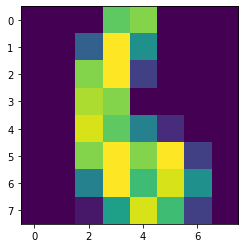

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
#loading the dataset
letters = datasets.load_digits()
#generating the classifier
clf = svm.SVC(gamma=0.001, C=100)
#training the classifier
X,y = letters.data[:-10], letters.target[:-10]
clf.fit(X,y)
#predicting the output 
print(clf.predict(letters.data[:-10]))
plt.imshow(letters.images[6], interpolation='nearest')
plt.show()